In [1]:
import os
import numpy as np
import pandas as pd
from itertools import chain
from collections import OrderedDict

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### <div class='info-circle alert alert-block alert-info'>Covid-19 Case Data</div>
- 2020-01-23 to 2020-04-01

#### cumulative cases

In [5]:
# 0123-0401
case_df = pd.read_csv('Data/city_cumulative_cases.csv')

case_df.shape

(366, 72)

In [6]:
# city coding: 
# cities outside of Hubei: 0
# cities in Hubei (not Wuhan): 1
# city of Wuhan: 2

hubei_cities = ['武汉市', '黄石市', '十堰市', '宜昌市', '襄阳市', '鄂州市', '荆门市', '孝感市', 
                '荆州市', '黄冈市', '咸宁市', '随州市', '恩施土家族苗族自治州', '仙桃市', '潜江市', '天门市', '神农架林区']

case_df['hubei_city'] = case_df['city_cn'].map(
        lambda x: 0 if x not in hubei_cities else (2 if x=='武汉市' else 1) )

In [7]:
case_df.head()

,city_cn,city_id,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,hubei_city
0,北京市,110000,26,36,51,67,80,96,112,132,156,183,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,417,418,422,426,428,428,429,435,435,436,437,442,446,455,458,479,485,499,512,522,554,559,565,569,572,576,577,580,580,582,0
1,天津市,120000,0,8,10,14,23,24,27,31,32,41,48,60,67,69,79,81,88,91,95,107,113,119,120,122,125,127,128,130,131,133,135,135,135,135,135,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,137,137,137,141,142,145,147,152,156,163,166,174,174,176,0
2,石家庄市,130100,1,4,5,7,9,10,11,11,12,13,16,21,21,24,24,24,24,25,27,27,27,27,27,28,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,0
3,唐山市,130200,0,0,0,0,1,3,3,7,8,11,11,11,12,17,19,23,27,28,31,33,35,43,46,51,51,51,55,56,57,57,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0
4,秦皇岛市,130300,0,0,0,0,0,0,0,0,1,1,2,2,3,3,5,7,7,7,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0


##### daily case plot

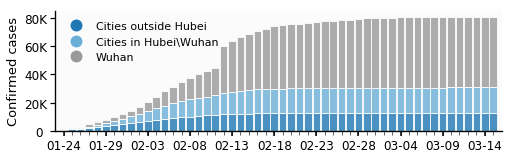

In [8]:
fig, ax = plt.subplots(figsize=(8, 2.2))

ax.patch.set_alpha(0.015)
ax.set_facecolor('#2b3679')

dates = [str(d.date()) for d in pd.date_range('2020-01-24', '2020-03-15')]

width = 0.9

# 1. cities not in Hubei
# ---------------------
plot_df = case_df.copy()
# plot_df = plot_df[~plot_df['city_cn'].isin(hubei_cities)]
plot_df = plot_df[plot_df['hubei_city']==0]
plot_df = plot_df.loc[:, dates]
plot_df = plot_df.sum(axis=0).reset_index().rename(columns={'index': 'date', 0:'count'})

x1 = plot_df['date']
y1 = plot_df['count']
ax.bar(x1, y1,
                width=width,
                edgecolor='w',
                color='#1f77b4', 
                alpha=.8,
                )


# 2. cities in Hubei excluding Wuhan
# ---------------------
plot_df = case_df.copy()
plot_df = plot_df[plot_df['hubei_city']==1]
plot_df = plot_df.loc[:, dates]
plot_df = plot_df.sum(axis=0).reset_index().rename(columns={'index': 'date', 0:'count'})

x2 = plot_df['date']
y2 = plot_df['count']
ax.bar(x2, y2, bottom=y1,
                width=width,
                edgecolor='w',
                color='#6baed6', 
                alpha=.8,
                )


# 3. city of Wuhan
# ---------------------
plot_df = case_df.copy()
plot_df = plot_df[plot_df['hubei_city']==2]
plot_df = plot_df.loc[:, dates]
plot_df = plot_df.sum(axis=0).reset_index().rename(columns={'index': 'date', 0:'count'})

x3 = plot_df['date']
y3 = plot_df['count']
ax.bar(x3, y3, bottom=y1+y2,
                width=width,
                edgecolor='w',
#                 linewidth=0.1,
                color='#999999', 
                alpha=.8,
                )



N = len(x1)

every_nth = 1
locs = range(0, N, every_nth)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

every_nth = 5
locs = range(0, N, every_nth)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))

# ticks = list(x)
ticks = list(x1.str[-5:])
# ticks.insert(0, '')
ticks.append('03-16')
# string date
plt.xticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='center',
           # va = 'center',
           position=(0, 0)
           # rotation_mode="anchor"
          )

locs = range(0, 100000, 20000)
ax.yaxis.set_major_locator(ticker.FixedLocator(locs))
ticks = [f'{int(i/1000)}K' for i in locs[1:]]
ticks.insert(0, '0 ')
plt.yticks(locs, ticks)


border_width = 1.35
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=3, labelsize=12, length=5, width=1.5, direction='out')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=3, labelsize=12, length=5, width=1.2, direction='out')
ax.tick_params(axis='x', which='minor', top=False, right=False, length=4,  width=.6, direction='out')
ax.tick_params(axis='y', which='minor', top=False, right=False, length=4,  width=.6, direction='out')


# # plt.xlim(-1)
ax.set_xlim(left=-1, right=52)

other_cities = Line2D([0], [0], color='#1f77b4', marker='o',markersize=13, linestyle='None', markeredgecolor='w')
hubei = Line2D([0], [0], color='#6baed6', marker='o',markersize=13, linestyle='None', markeredgecolor='w')
wuhan = Line2D([0], [0], color='#999999', marker='o',markersize=13, linestyle='None', markeredgecolor='w')

# ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Confirmed cases', fontsize=13)


real_legend = ax.legend((other_cities, hubei, wuhan), 
                        ('Cities outside Hubei','Cities in Hubei\Wuhan', 'Wuhan'), 
                        numpoints=1, fontsize=11, frameon=False, loc='best')

out_dir = 'Outputs'
# plt.savefig(os.path.join(out_dir, 'fig2-cumulative_cases.pdf'), pad_inches=0.01, bbox_inches='tight')

# plt.show()

#### daily new cases
* there may exist negative values in one day as cases may be overestimated in previous days in some areas

In [9]:
dates = [str(d.date()) for d in pd.date_range('2020-01-23', '2020-04-01')]
daily_case_df = case_df[dates].diff(axis=1)

daily_case_df['city_cn'] = case_df['city_cn']

hubei_cities = ['武汉市', '黄石市', '十堰市', '宜昌市', '襄阳市', '鄂州市', '荆门市', '孝感市', 
                '荆州市', '黄冈市', '咸宁市', '随州市', '恩施土家族苗族自治州', '仙桃市', '潜江市', '天门市', '神农架林区']
daily_case_df['hubei_city'] = daily_case_df['city_cn'].map(
    lambda x: 0 if x not in hubei_cities else (2 if x=='武汉市' else 1) )
daily_case_df.shape

(366, 72)

In [10]:
daily_case_df.head()

,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,city_cn,hubei_city
0,NaN,10.0,15.0,16.0,13.0,16.0,16.0,20.0,24.0,27.0,29.0,16.0,25.0,21.0,23.0,18.0,11.0,11.0,5.0,10.0,14.0,6.0,3.0,5.0,1.0,6.0,6.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,10.0,0.0,1.0,2.0,1.0,0.0,3.0,1.0,4.0,4.0,2.0,0.0,1.0,6.0,0.0,1.0,1.0,5.0,4.0,9.0,3.0,21.0,6.0,14.0,13.0,10.0,32.0,5.0,6.0,4.0,3.0,4.0,1.0,3.0,0.0,2.0,北京市,0
1,NaN,8.0,2.0,4.0,9.0,1.0,3.0,4.0,1.0,9.0,7.0,12.0,7.0,2.0,10.0,2.0,7.0,3.0,4.0,12.0,6.0,6.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,3.0,2.0,5.0,4.0,7.0,3.0,8.0,0.0,2.0,天津市,0
2,NaN,3.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,5.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,石家庄市,0
3,NaN,0.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,3.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,1.0,3.0,2.0,2.0,8.0,3.0,5.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,唐山市,0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,秦皇岛市,0


### <div class='info-circle alert alert-block alert-info'>Mobility Data</div>
* distance: spatial distance to Wuhan
* local_flow: human flow from Wuhan
* pagerank: PageRank centrality of a city in the mobility network

In [11]:
mobility_df = pd.read_csv('Data/mobility_data.csv')
mobility_df.shape

(366, 6)

In [12]:
mobility_df.head()

,city_cn,city,city_id,distance,local_flow,pagerank
0,北京市,Beijing,110000,1050.640158,184.353501,0.015574
1,天津市,Tianjin,120000,978.840171,30.484535,0.005574
2,石家庄市,Shijiazhuang,130100,826.627664,30.892180,0.005191
3,唐山市,Tangshan,130200,1062.805689,9.256908,0.002692
4,秦皇岛市,Qinhuangdao,130300,1142.576314,4.230623,0.001597


#### Intra-city Avtivity Data: measured by Baidu Migration
* mean_intensity: the mean/daily activity intensity from 2020-01-01 to 2020-01-27
* intensity_2020: the aggregated activity intensity from 2020-01-01 to 2020-03-15
* intensity_2019: the aggregated activity intensity in 2019 (corresponding to 2020 in Lunar calendar)
* intensity_reduction: intensity_2019 - intensity_2020

In [13]:
intensity_df = pd.read_csv('Data/intra_city_activity_intensity.csv')
intensity_df.shape

(366, 5)

In [14]:
intensity_df.head()

,city_cn,mean_intensity,intensity_2019,intensity_2020,intensity_reduction
0,北京市,5.677559,331.9212,241.5429,90.3783
1,天津市,5.610923,356.6680,258.5126,98.1554
2,石家庄市,5.479823,346.9245,260.6993,86.2252
3,唐山市,5.583632,355.8822,288.3937,67.4885
4,秦皇岛市,5.384295,333.1633,280.1461,53.0172


### <div class='info-circle alert alert-block alert-info'>City Info</div>

In [15]:
city_info_df = pd.read_csv('Data/city_info.csv')
city_info_df.shape

(366, 14)

In [16]:
city_info_df['city_tier1'] = city_info_df['tier'].map(lambda x: 1 if x in ['Tier 1', 'new Tier 1'] else 0)
city_info_df['city_tier2'] = city_info_df['tier'].map(lambda x: 1 if x in ['Tier 2'] else 0)
city_info_df['city_tier3'] = city_info_df['tier'].map(lambda x: 1 if x in ['Tier 3'] else 0)
city_info_df['city_tier4'] = city_info_df['tier'].map(lambda x: 1 if x in ['Tier 4'] else 0)
city_info_df['city_tier5'] = city_info_df['tier'].map(lambda x: 1 if x not in ['Tier 1', 'new Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'] else 0)

In [17]:
city_info_df.head()

,city_cn,city,city_id,province_cn,province,tier,lat,lng,population,GDP,GDP_growth_2019,GDP_2020Q1,GDP_pc,GDP_growth_rate,city_tier1,city_tier2,city_tier3,city_tier4,city_tier5
0,北京市,Beijing,110000,北京市,Beijing,Tier 1,39.910925,116.413384,2153.60,35371.30,6.1,7462.20,16.424266,0.843871,1,0,0,0,0
1,天津市,Tianjin,120000,天津市,Tianjin,new Tier 1,39.093668,117.209523,1561.83,14104.00,4.8,2874.35,9.030432,0.815187,1,0,0,0,0
2,石家庄市,Shijiazhuang,130100,河北省,Hebei,Tier 2,38.048312,114.521532,1039.42,5809.90,6.7,1349.40,5.589560,0.929035,0,1,0,0,0
3,唐山市,Tangshan,130200,河北省,Hebei,Tier 3,39.636584,118.186459,796.40,6890.00,7.3,1375.20,8.651431,0.798374,0,0,1,0,0
4,秦皇岛市,Qinhuangdao,130300,河北省,Hebei,Tier 3,39.941748,119.608531,314.63,1612.02,6.7,352.09,5.123542,0.873662,0,0,1,0,0


### <div class="alert alert-block alert-danger">Merge the Data</div>
* use 'city_cn' (Chinese name) or 'city_id' to merge the data. 
* don't use 'city' (English name) alone as some cities share one English name. For example, the English names of '苏州市' and '宿州市' are both 'Suzhou'.

In [18]:
covid_df = pd.merge(city_info_df, 
                    mobility_df.drop(['city', 'city_id'], axis=1),
                    on='city_cn'
                   )

In [19]:
covid_df = pd.merge(covid_df, intensity_df, on='city_cn')

In [20]:
covid_df = pd.merge(covid_df, case_df.drop(['city_id'], axis=1), 
                    on='city_cn')

In [21]:
covid_df.shape

(366, 97)

In [22]:
covid_df.head()

,city_cn,city,city_id,province_cn,province,tier,lat,lng,population,GDP,GDP_growth_2019,GDP_2020Q1,GDP_pc,GDP_growth_rate,city_tier1,city_tier2,city_tier3,city_tier4,city_tier5,distance,local_flow,pagerank,mean_intensity,intensity_2019,intensity_2020,intensity_reduction,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,hubei_city
0,北京市,Beijing,110000,北京市,Beijing,Tier 1,39.910925,116.413384,2153.60,35371.30,6.1,7462.20,16.424266,0.843871,1,0,0,0,0,1050.640158,184.353501,0.015574,5.677559,331.9212,241.5429,90.3783,26,36,51,67,80,96,112,132,156,183,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,417,418,422,426,428,428,429,435,435,436,437,442,446,455,458,479,485,499,512,522,554,559,565,569,572,576,577,580,580,582,0
1,天津市,Tianjin,120000,天津市,Tianjin,new Tier 1,39.093668,117.209523,1561.83,14104.00,4.8,2874.35,9.030432,0.815187,1,0,0,0,0,978.840171,30.484535,0.005574,5.610923,356.6680,258.5126,98.1554,0,8,10,14,23,24,27,31,32,41,48,60,67,69,79,81,88,91,95,107,113,119,120,122,125,127,128,130,131,133,135,135,135,135,135,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,137,137,137,141,142,145,147,152,156,163,166,174,174,176,0
2,石家庄市,Shijiazhuang,130100,河北省,Hebei,Tier 2,38.048312,114.521532,1039.42,5809.90,6.7,1349.40,5.589560,0.929035,0,1,0,0,0,826.627664,30.892180,0.005191,5.479823,346.9245,260.6993,86.2252,1,4,5,7,9,10,11,11,12,13,16,21,21,24,24,24,24,25,27,27,27,27,27,28,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,0
3,唐山市,Tangshan,130200,河北省,Hebei,Tier 3,39.636584,118.186459,796.40,6890.00,7.3,1375.20,8.651431,0.798374,0,0,1,0,0,1062.805689,9.256908,0.002692,5.583632,355.8822,288.3937,67.4885,0,0,0,0,1,3,3,7,8,11,11,11,12,17,19,23,27,28,31,33,35,43,46,51,51,51,55,56,57,57,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0
4,秦皇岛市,Qinhuangdao,130300,河北省,Hebei,Tier 3,39.941748,119.608531,314.63,1612.02,6.7,352.09,5.123542,0.873662,0,0,1,0,0,1142.576314,4.230623,0.001597,5.384295,333.1633,280.1461,53.0172,0,0,0,0,0,0,0,0,1,1,2,2,3,3,5,7,7,7,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0


### <div class="alert alert-block alert-info">Combined data are stored in the following file:</div>

In [23]:
dates = [str(d.date()) for d in pd.date_range('2020-01-23', '2020-04-01')]

In [24]:
combined_df = covid_df.copy()
# rename date
for date in dates:
    new_name = 'date_' + ''.join(date[-5:].split('-'))
    combined_df.rename(columns = {date: new_name}, inplace=True)

In [25]:
# combined_df.head()

In [26]:
# combined_df.to_csv('Data/combined_data.csv', encoding='utf-8_sig', index=False)

### <div class="alert alert-block alert-success"> 1. Regression Analysis </div>
#### Human flow from Wuhan explains the spatial distribution of COVID-19:  

#### OLS Regression
log_cumulative_cases ~ log_local_flow

In [27]:
reg_df = covid_df.copy()

# excluding Wuhan
reg_df = reg_df[reg_df['city_cn']!='武汉市']


# human flow from Wuhan is the sole predictor
iv = 'local_flow'
reg_df['log_{}'.format(iv)] = reg_df[iv].map(lambda x: np.log(x+1))
iv = 'log_{}'.format(iv)


results = []

dates = [str(d.date()) for d in pd.date_range('2020-01-24', '2020-03-15')]

for date in dates:

    reg_df['cumulative_cases'] = reg_df[date]

    dv = 'cumulative_cases'
    reg_df['log_{}'.format(dv)] = reg_df[dv].map(lambda x: np.log(x+1))

    dv = 'log_{}'.format(dv)


    formula = '{0} ~ {1}'.format(dv, iv)

    model = smf.ols(formula, data=reg_df).fit()

    R2 = model.rsquared
    R2_adj = model.rsquared_adj
    
    dic = OrderedDict()
    dic['date'] = date
    dic['R2'] = R2
    dic['R2_adj'] = R2_adj
    
    results.append(dic)
    
#     print(f'[date]: {date}, [R^2]: {R2:.5f}, [adjusted R^2]: {R2_adj:.5f}')
   

In [28]:
print('The regression is expresed as:', formula)

The regression is expresed as: log_cumulative_cases ~ log_local_flow


In [29]:
R2_df = pd.DataFrame(results)
R2_df.head()
# R2_df

,date,R2,R2_adj
0,2020-01-24,0.433859,0.432299
1,2020-01-25,0.586411,0.585272
2,2020-01-26,0.696139,0.695302
3,2020-01-27,0.726518,0.725765
4,2020-01-28,0.743971,0.743266


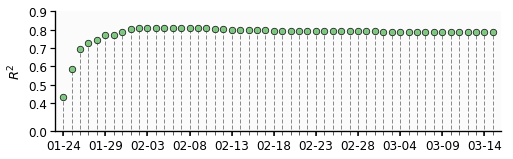

In [30]:
plot_df = R2_df.copy()

fig, ax  = plt.subplots(figsize=(8, 2.2))


ax.patch.set_alpha(0.015)
ax.set_facecolor('#2b3679')


# =================
x = plot_df['date']
y = plot_df['R2']


## lollipop plot
ax.vlines(x, ymin=0, ymax=y, 
#           linewidth=1.5,
          linewidth=1,
          color='grey', 
          alpha=0.9,
          zorder=30,
#           linestyle='-',
          linestyle=(0, (4, 2)),
         )

ax.plot(x, y, "o", 
        # color='#e5001d', 
        markeredgecolor='k', 
        markeredgewidth=.75,
#         markerfacecolor='#ff9896',
#         markerfacecolor='#46ac88',
        markerfacecolor='#74c476',
        alpha=0.9, 
#         markersize=8.5,
        markersize=6.5,
        clip_on =False,
        zorder=30,
       )


N = len(x)

every_nth = 1
locs = range(0, N, every_nth)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

every_nth = 5
locs = range(0, N, every_nth)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))


locs = range(0, 10, 1)
locs = [i/10.0 for i in locs]
ax.yaxis.set_major_locator(ticker.FixedLocator(locs))


ticks = list(x)
ticks = list(x.str[-5:])
# ticks.insert(0, '')

plt.xticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='center',
           # va = 'center',
           position=(0, 0),
           # rotation_mode="anchor",
          )



ticks = ['0.0', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
plt.yticks([0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], ticks, rotation='0')


# ax.set_xlabel('Date', fontsize=13)
# ax.set_ylabel('$R^2$', fontsize=13, labelpad=10, rotation=0)
ax.set_ylabel('$R^2$', fontsize=13)


border_width = 1.35
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for k, spine in ax.spines.items():  #ax.spines is a dictionary
    spine.set_zorder(100)


# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=3, labelsize=12, length=5, width=1.5, direction='out')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=3, labelsize=12, length=5, width=1.2, direction='out')
ax.tick_params(axis='x', which='minor', top=False, right=False, length=4,  width=.6, direction='out')
ax.tick_params(axis='y', which='minor', top=False, right=False, length=4,  width=.6, direction='out')


ax.set_xlim(-1, list(x).index('2020-03-15')+1)
ax.set_ylim(0.25, .9)


# plt.tight_layout(pad=0.1)
out_dir = 'Outputs'
# plt.savefig(os.path.join(out_dir, 'fig2-cumulative_cases_R2_by_date.pdf'), pad_inches=0.02, bbox_inches='tight')


### <div class="alert alert-block alert-success"> 2. Regression Analysis </div>
#### Spatial Spread of COVID-19

* OLS Regression
* Negative Binomial Regression

Regressions are performed in both Python and R. This tutorial presents Python implimentations. See 'Figure2-spatial analysis by R.ipynb' for R implimentations.

#### OLS Regression
log_cumulative_cases ~ log_local_flow + log_pagerank + log_population + log_distance + mean_intensity + city_tier1 + city_tier2 + city_tier3 + city_tier4

In [31]:
reg_df = covid_df.copy()

# excluding Wuhan
reg_df = reg_df[reg_df['city_cn']!='武汉市']


cols = [
        'local_flow',
        'pagerank',
        'population',
        'distance',
       ]
# ----------------------------
# log-transform for highly skewed distributions
for col in cols:
    if col in ['pagerank', 'population']:
        reg_df['log_{}'.format(col)] = reg_df[col].map(lambda x: np.log(x))
    else:
        reg_df['log_{}'.format(col)] = reg_df[col].map(lambda x: np.log(x+1))
# ----------------------------
ivs = ['log_{}'.format(col) for col in cols]


ivs = ivs + [
            'mean_intensity',
            'city_tier1',
            'city_tier2',
            'city_tier3',
            'city_tier4',
            ]

reg_df['cumulative_cases'] = reg_df['2020-02-09']
# reg_df['cumulative_cases'] = reg_df['2020-03-01']
# reg_df['cumulative_cases'] = reg_df['2020-04-01']

dv = 'cumulative_cases'
reg_df['log_{}'.format(dv)] = reg_df[dv].map(lambda x: np.log(x+1))
dv = 'log_{}'.format(dv)

formula = '{0} ~ {1}'.format(dv, ' + '.join(ivs))

ols_model = smf.ols(formula, data=reg_df).fit()
# print('\n\n\n- - - - - - - - - - - -\n{}\n'.format(formula))

print('\nRegression Model: ')
s = '- ' * 20
print(f'{s}\n{formula}')
print(s+'\n')

ols_model.summary()


Regression Model: 
- - - - - - - - - - - - - - - - - - - - 
log_cumulative_cases ~ log_local_flow + log_pagerank + log_population + log_distance + mean_intensity + city_tier1 + city_tier2 + city_tier3 + city_tier4
- - - - - - - - - - - - - - - - - - - - 



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     log_cumulative_cases   R-squared:                       0.832
Model:                              OLS   Adj. R-squared:                  0.828
Method:                   Least Squares   F-statistic:                     194.7
Date:                  Tue, 16 Nov 2021   Prob (F-statistic):          2.90e-131
Time:                          13:23:21   Log-Likelihood:                -365.35
No. Observations:                   364   AIC:                             750.7
Df Residuals:                       354   BIC:                             789.7
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2712      1.457     -0.873      0.384      -4.137       1.594
log_local_flow     0.8187      0.061     13.440      0.000       0.699       0.938
log_pagerank      -0.2281      0.112     -2.042      0.042      -0.448      -0.008
log_population     0.2410      0.063      3.811      0.000       0.117       0.365
log_distance      -0.1721      0.100     -1.716      0.087      -0.369       0.025
mean_intensity     0.0901      0.055      1.642      0.102      -0.018       0.198
city_tier1         0.5803      0.226      2.570      0.011       0.136       1.024
city_tier2         0.4786      0.164      2.921      0.004       0.156       0.801
city_tier3         0.2048      0.125      1.635      0.103      -0.042       0.451
city_tier4         0.0057      0.107      0.053      0.958      -0.205       0.217
==============================================================================
Omnibus:                       22.382   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.966
Skew:                           0.362   Prob(JB):                     7.71e-10
Kurtosis:                       4.497   Cond. No.                         504.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# ols regression results

results_as_html = ols_model.summary().tables[1].as_html()

ols_result_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
ols_result_df = ols_result_df.reset_index()

ols_result_df

,index,coef,std err,t,P>|t|,[0.025,0.975]
0,Intercept,-1.2712,1.457,-0.873,0.384,-4.137,1.594
1,log_local_flow,0.8187,0.061,13.440,0.000,0.699,0.938
2,log_pagerank,-0.2281,0.112,-2.042,0.042,-0.448,-0.008
3,log_population,0.2410,0.063,3.811,0.000,0.117,0.365
4,log_distance,-0.1721,0.100,-1.716,0.087,-0.369,0.025
5,mean_intensity,0.0901,0.055,1.642,0.102,-0.018,0.198
6,city_tier1,0.5803,0.226,2.570,0.011,0.136,1.024
7,city_tier2,0.4786,0.164,2.921,0.004,0.156,0.801
8,city_tier3,0.2048,0.125,1.635,0.103,-0.042,0.451
9,city_tier4,0.0057,0.107,0.053,0.958,-0.205,0.217


#### Negative Binomial Regression
cumulative_cases ~ exp(log_local_flow + log_pagerank + log_population + log_distance + mean_intensity + city_tier1 + city_tier2 + city_tier3 + city_tier4)

In [33]:
reg_df = covid_df.copy()

# excluding Wuhan
reg_df = reg_df[reg_df['city_cn']!='武汉市']


cols = [
        'local_flow',
        'pagerank',
        'population',
        'distance',
       ]
# ----------------------------
# log-transform for highly skewed distributions
for col in cols:
    if col in ['pagerank', 'population']:
        reg_df['log_{}'.format(col)] = reg_df[col].map(lambda x: np.log(x))
    else:
        reg_df['log_{}'.format(col)] = reg_df[col].map(lambda x: np.log(x+1))
# ----------------------------
ivs = ['log_{}'.format(col) for col in cols]


ivs = ivs + [
            'mean_intensity',
            'city_tier1',
            'city_tier2',
            'city_tier3',
            'city_tier4',
            ]

reg_df['cumulative_cases'] = reg_df['2020-02-09']
# reg_df['cumulative_cases'] = reg_df['2020-03-01']
# reg_df['cumulative_cases'] = reg_df['2020-04-01']

dv = 'cumulative_cases'

formula = '{0} ~ {1}'.format(dv, ' + '.join(ivs))

# α- dispersion parameter: can be obtained from R:MASS analysis
# alpha = 0.444531
alpha = 0.444530992433666

nb_model = smf.glm(formula, data=reg_df, 
                        family = sm.families.NegativeBinomial(alpha=alpha)).fit()

# nb_model = smf.negativebinomial(formula, data=reg_df).fit()

print('\nRegression Model: ')
s = '- ' * 20
print(f'{s}\n{formula}')
print(s+'\n')

nb_model.summary()


Regression Model: 
- - - - - - - - - - - - - - - - - - - - 
cumulative_cases ~ log_local_flow + log_pagerank + log_population + log_distance + mean_intensity + city_tier1 + city_tier2 + city_tier3 + city_tier4
- - - - - - - - - - - - - - - - - - - - 



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       cumulative_cases   No. Observations:                  364
Model:                            GLM   Df Residuals:                      354
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1357.2
Date:                Tue, 16 Nov 2021   Deviance:                       433.10
Time:                        13:23:22   Pearson chi2:                     657.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.6390      1.633     -2.229      0.026      -6.839      -0.439
log_local_flow     0.8335      0.066     12.692      0.000       0.705       0.962
log_pagerank      -0.3972      0.122     -3.259      0.001      -0.636      -0.158
log_population     0.4125      0.077      5.369      0.000       0.262       0.563
log_distance      -0.1418      0.112     -1.269      0.204      -0.361       0.077
mean_intensity     0.1604      0.068      2.355      0.019       0.027       0.294
city_tier1         0.3396      0.240      1.417      0.156      -0.130       0.809
city_tier2         0.3806      0.174      2.189      0.029       0.040       0.721
city_tier3         0.0018      0.136      0.013      0.990      -0.266       0.269
city_tier4        -0.1567      0.118     -1.323      0.186      -0.389       0.075
==================================================================================
"""

In [34]:
# negative Binomial regression results

results_as_html = nb_model.summary().tables[1].as_html()

nb_result_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
nb_result_df = nb_result_df.reset_index()

nb_result_df

,index,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,-3.6390,1.633,-2.229,0.026,-6.839,-0.439
1,log_local_flow,0.8335,0.066,12.692,0.000,0.705,0.962
2,log_pagerank,-0.3972,0.122,-3.259,0.001,-0.636,-0.158
3,log_population,0.4125,0.077,5.369,0.000,0.262,0.563
4,log_distance,-0.1418,0.112,-1.269,0.204,-0.361,0.077
5,mean_intensity,0.1604,0.068,2.355,0.019,0.027,0.294
6,city_tier1,0.3396,0.240,1.417,0.156,-0.130,0.809
7,city_tier2,0.3806,0.174,2.189,0.029,0.040,0.721
8,city_tier3,0.0018,0.136,0.013,0.990,-0.266,0.269
9,city_tier4,-0.1567,0.118,-1.323,0.186,-0.389,0.075


##### Negative Binomial Regression: predicted vs confirmed

In [35]:
out_sample_df = reg_df[ivs].copy()

reg_df['raw_predicted'] = nb_model.predict(out_sample_df)
reg_df['predicted'] = reg_df['raw_predicted'].map(np.round)

In [36]:
pred_df= reg_df[['city_cn', 'cumulative_cases', 
                 'raw_predicted', 'predicted', 'hubei_city']].dropna()
pred_df.shape

(364, 5)

In [37]:
pred_df.head()

,city_cn,cumulative_cases,raw_predicted,predicted,hubei_city
0,北京市,337,329.053697,329.0,0
1,天津市,91,98.847292,99.0,0
2,石家庄市,25,90.798560,91.0,0
3,唐山市,28,27.557619,28.0,0
4,秦皇岛市,7,12.645066,13.0,0


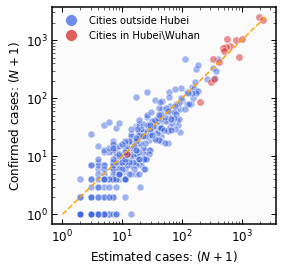

In [38]:
fig, ax = plt.subplots(figsize=(4,4))

ax.patch.set_alpha(0.015)
ax.set_facecolor('#2b3679')

plot_df = pred_df.copy()

# 非湖北城市
# --------------------------
x = plot_df[plot_df['hubei_city'] == 0]['predicted']
y = plot_df[plot_df['hubei_city'] == 0]['cumulative_cases']

# prevent values with 0
x=x+1
y=y+1

ax.plot(x, y, 'o',
        markersize=7,
        markeredgecolor='w',
        markerfacecolor='royalblue',
        markeredgewidth=1,
        alpha = 0.5,
        zorder=10,
       )


# 湖北城市
# --------------------------
x = plot_df[plot_df['hubei_city'] == 1]['predicted']
y = plot_df[plot_df['hubei_city'] == 1]['cumulative_cases']

# prevent values with 0
x=x+1
y=y+1

ax.plot(x, y, 'o',
        markersize=7.5,
        markeredgecolor='w',
        markerfacecolor='C3',
        markeredgewidth=1,
        alpha = 0.5,
        zorder=10,
       )


# perfect prediction line
# --------------------------
x = np.linspace(1, 2500, 250)
ax.plot(x, x, '--', color='orange', zorder=11,)


# specifying appearance
# --------------------------
ax.set_xlabel('Estimated cases: $(N+1)$', fontsize=12)
ax.set_ylabel('Confirmed cases: $(N+1)$', fontsize=12)


plt.xscale('log')
plt.yscale('log')
# ax.set_xlim(0.5, 2500)


n = 3
loc_base = range(1, 10)

minor_locs = [np.array(range(1, 10))*(10**i) for i in range(n+1)]
minor_locs = list(chain(*minor_locs))
ax.xaxis.set_minor_locator(ticker.FixedLocator(minor_locs))
ax.yaxis.set_minor_locator(ticker.FixedLocator(minor_locs))

major_locs = [10**i for i in range(n+1)]
ax.xaxis.set_major_locator(ticker.FixedLocator(major_locs))
ax.yaxis.set_major_locator(ticker.FixedLocator(major_locs))

# do not show minor labels (duplicated labels)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_minor_formatter(ticker.NullFormatter())


ax.tick_params(axis='both', which='major', top=True, right=True, length=5, width=1, labelsize=12, pad=4, direction='in')
ax.tick_params(axis='both', which='minor', top=True, right=True, length=3, width=.6, labelsize=12, pad=15, direction='in')

border_width = 1.5
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)


other = Line2D([0], [0], color='royalblue', alpha=0.75, marker='o',markersize=12, linestyle='None', markeredgecolor='w')
hubei = Line2D([0], [0], color='C3', alpha=0.75, marker='o',markersize=12, linestyle='None', markeredgecolor='w')

real_legend = ax.legend((other, hubei), 
                        ('Cities outside Hubei','Cities in Hubei\Wuhan'), 
                        numpoints=1, fontsize=10, frameon=False, loc='best')


out_dir = 'Outputs'
# plt.savefig(os.path.join(out_dir, 'figS2-nb_predicted_vs_reported_cases.pdf'), 
#             pad_inches=0.05, bbox_inches='tight')


#### Forest plot of the regression results

In [39]:
iv_dic = {
    'Intercept': 'Intercept',
    'log_local_flow': 'Human flow from\n Wuhan (log)',
    'log_pagerank': 'Pagerank (log)',
    'log_population': 'Population (log)',
    'log_distance': 'Distance to\n Wuhan (log)',
    'mean_intensity': 'Intra-city activity',
    'city_tier1': 'First-tier city',
    'city_tier2': 'Second-tier city',
    'city_tier3': 'Third-tier city',
    'city_tier4': 'Fourth-tier city',
            }

In [40]:
def marker_color_func(p, coef):
    'marker color based on p-value and coefficient'
    
    p = float(p)
    coef = float(coef)
    
    if p<0.05 and coef>0:
        mc = '#fdae6b'
    elif p<0.05 and coef<0:
        mc = '#9ecae1'
    else:
        mc = '#dddddd'
        
    return mc

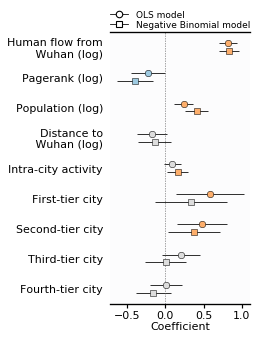

In [41]:
fig, ax = plt.subplots(figsize=(2.5, 5))
# fig, ax = plt.subplots(figsize=(2.5, 6))


ax.patch.set_alpha(0.01)
ax.set_facecolor('#2b3679')

space_adjust = 0.13
marker_size = 6.5
line_width = .8


# filter iv
focused_ivs = ['log_local_flow', 
               'log_pagerank', 
               'log_population', 
               'log_distance', 
               'mean_intensity', 
               'city_tier1', 'city_tier2', 'city_tier3', 'city_tier4']


# ----------------
# nb model
plot_df = nb_result_df.copy()
plot_df = plot_df[plot_df['index']!='Intercept']

plot_df = plot_df[plot_df['index'].isin(focused_ivs)]

plot_df = plot_df[::-1]
plot_df = plot_df.reset_index(drop=True)


x = plot_df['index']
y = plot_df['coef']
# yerr = plot_df['std err']*1.96
ps = plot_df['P>|z|']

# ax.plot(
#         y, x, 'o',
#         markersize=6,
#         markeredgecolor='k', 
#         markeredgewidth=1,
#         markerfacecolor='C2',
#         alpha=.5,
#         )

ivs = plot_df['index'].tolist()

for i in range(len(x)):
    p = plot_df['P>|z|'].iloc[i]
    coef = plot_df['coef'].iloc[i]
    index = plot_df['index'].iloc[i]
    
    mc = marker_color_func(p=p, coef=coef)
            
    ax.plot(
            coef, ivs.index(index)-space_adjust, 's',
            markersize=marker_size,
            markeredgecolor='k', 
            markeredgewidth=.5,
            markerfacecolor=mc,
            # alpha=.9,
            )



for i in range(len(plot_df)):
    row = plot_df.iloc[i]
    ax.hlines(y=i-space_adjust, xmin=row['[0.025'], xmax=row['0.975]'], linestyles='-', 
              linewidth=line_width, color='k')


    
# ----------------
# ols model
plot_df = ols_result_df.copy()
plot_df = plot_df[plot_df['index']!='Intercept']

plot_df = plot_df[plot_df['index'].isin(focused_ivs)]

plot_df = plot_df[::-1]
plot_df = plot_df.reset_index(drop=True)

    
for i in range(len(x)):
    p = plot_df['P>|t|'].iloc[i]
    coef = plot_df['coef'].iloc[i]
    index = plot_df['index'].iloc[i]
    
    mc = marker_color_func(p=p, coef=coef)
            
    ax.plot(
            coef, ivs.index(index)+space_adjust, 'o',
            markersize=marker_size,
            markeredgecolor='k', 
            markeredgewidth=.5,
            markerfacecolor=mc,
            # alpha=.9,
            )


for i in range(len(plot_df)):
    row = plot_df.iloc[i]
    ax.hlines(y=i+space_adjust, xmin=row['[0.025'], xmax=row['0.975]'], linestyles='-', 
              linewidth=line_width, color='k')
# ----------------
    

line_style = (0, (3, 2))
ax.vlines(x=0, ymin=-1, ymax=len(x), linestyles=line_style, 
          linewidth=.5, color='#555555')



locs = np.arange(-1, 4, 0.5)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

locs = np.arange(-1, 4, 0.5)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))


# ticks = ivs
# ticks = [iv_dic[iv] for iv in ivs]
ticks = [iv_dic[iv] for iv in plot_df['index']]
N=len(ticks)
every_nth=1
plt.yticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='right',
           # va = 'center',
           position=(0, 0)
           # rotation_mode="anchor"
          )

border_width = 1.35
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)


# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=2, labelsize=11, length=4, width=1.2, direction='out')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=7.5, labelsize=11, length=0, width=1.2, direction='out')
ax.tick_params(axis='both', which='minor', top=False, right=False, length=3,  width=.8, direction='out')

ax.set_xlabel('Coefficient', fontsize=11, labelpad=1)

nb_ml = Line2D([0], [0], color='k',  linestyle='-', linewidth=line_width,
                       marker='s',markersize=marker_size, markerfacecolor='w', markeredgewidth=1.1, markeredgecolor='k')
ols_ml = Line2D([0], [0], color='k',  linestyle='-', linewidth=line_width,
                       marker='o',markersize=marker_size, markerfacecolor='w', markeredgewidth=1.1, markeredgecolor='k')

real_legend = ax.legend((ols_ml, nb_ml), ('OLS model', 'Negative Binomial model'), 
#                         ncol=2,
                        frameon=False,
                        numpoints=1, fontsize=9,  
                        labelspacing=0.15,
#                         loc='best', 
                        loc='center',
                        bbox_to_anchor=(0.5, 1.045))

plt.ylim(-.5, len(plot_df)-0.5)


# plt.tight_layout(pad=0.1)
out_dir = 'Outputs'
# plt.savefig(os.path.join(out_dir, 'fig2-regression_results.pdf'), pad_inches=.01, bbox_inches='tight')
